<img src='https://www.skylinelabs.in/blog/images/tensorflow.jpg' align=left width=450 />

# Data Analysis using Jupyter Notebook
> - __주피터 노트북__ 을 사용해서, 데이터 분석하기
> - __테이터분석__ 을 잘하려면 __R__ 과 파이썬 특히 __주피터__ 를 잘 사용해야 한다.
> - 그런데, 주피터 노트북은 __아톰__ 에디터로 편집하는것과 좀 다르다, 아니 많이 다르다.
> - 특히, 자신의 위치를 판단하는 __os.path.dirname(\_\_file\_\_)__ 이 안된다. __매직매서드__ 지원이 안된다.
> - __구글 콜랩__ 과 비교해서도 __아쉬운 점__ 이 많다, 특히 __이미지 리사이징__ 기능 지원이 그렇다.

In [8]:
import os
import sys

## If you changed the current working dir, 
> * First, check environment namespace for variable workbookDir
> * this will take you back to the workbook dir.
> * os.path.dirname(self)

In [5]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
    
print('workbookDir= ' + workbookDir)
os.chdir(workbookDir)  

workbookDir= C:\Users\nitt0\Documents\Github\deep_MLDL\colab_notebooks


In [9]:
# '루트'와 '작업'디렉토리 설정 - for 스크립트런
DIRS = workbookDir.partition("deep_MLDL")
ROOT = DIRS[0] + DIRS[1]
CSV_DIR = os.path.join(ROOT, "_statics", "_csv_hunkim", "")
FNAME_WITH_DIR = CSV_DIR + 'voice_with_header.csv'

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_voice = pd.read_csv(FNAME_WITH_DIR)
print(df_voice.shape)
df_voice.head(10)

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


## label값 male=1.0, female=0.0 으로 변경한다
> * 라벨'값을 숫자로 바꾼다, ---> male = 1.0, female = 0.0
> * 집합 set() 의 형태로 보여준다. --> __ set(df_voice['label']) __

In [33]:
if 'female' in set(df_voice['label']) or 'male' in set(df_voice['label']):
    print('[변경전] %s' % set(df_voice['label']), end='')
    df_voice['label'].replace(['male', 'female'], [1., 0.], inplace=True)
    print('  .... [변경후] %s' % set(df_voice['label']))
else: 
    print('이미, 값을 변경 하였습니다. 라벨은 ... %s' % set(df_voice['label']))

df_voice.tail(2)

[변경전] {'male', 'female'}  .... [변경후] {0.0, 1.0}


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0.0
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,0.0


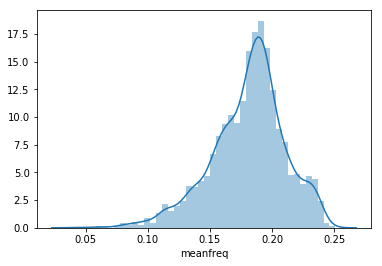

In [36]:
sns.distplot(df_voice['meanfreq'])
# sns.distplot(df_voice['label'])

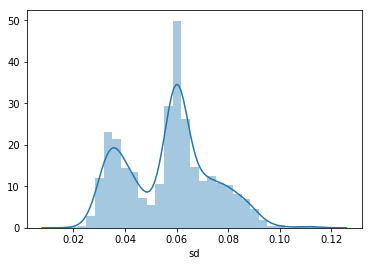

In [37]:
sns.distplot(df_voice['sd'])

In [85]:
def show_phist(x, title):
    fig = plt.figure(figsize=(15,4))

    fig.add_subplot(1, 2, 1)
    plt.title(title)
    plt.plot(x)
    plt.plot(df_voice['label']*max(set(x)))

    fig.add_subplot(1, 2, 2)
    plt.grid(True)
    sns.distplot(x)

## 데이터 플롯 + 히스토그램을 검토한다.
> * 데이터 플롯은 검측된 자료를 사실 그대로 관찰해여 추세를 본다.
> * 남성과 여성의 분포와 매칭하여 어떤 경향이 있는지, 판단해 본다 (주황색 선)
>> 1. 셔플로 섞어버리면 비교 분석이 어렵다, 정돈 된 상태로 매칭 하는것이 좋다.
>> 1. HIGH = 남성
>> 1. LOW = 여성
> * 히스토그램은 데이터의 분포를 본다


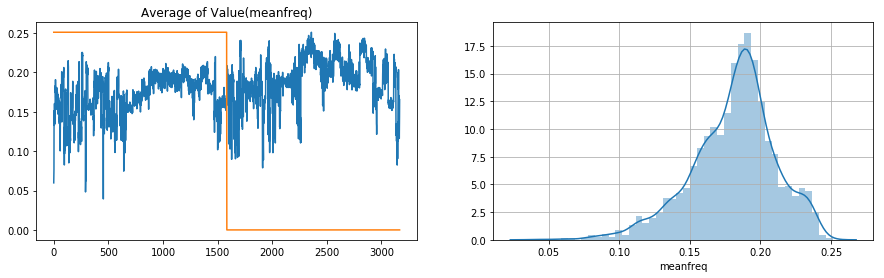

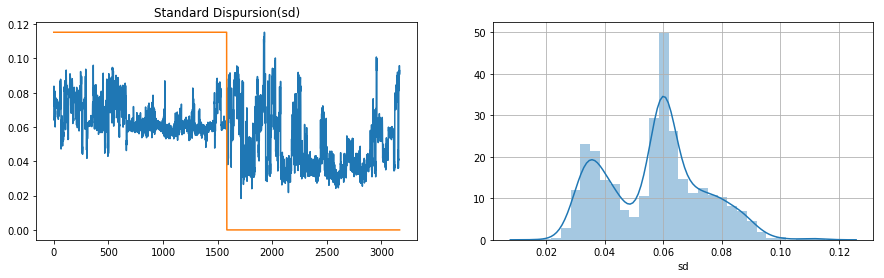

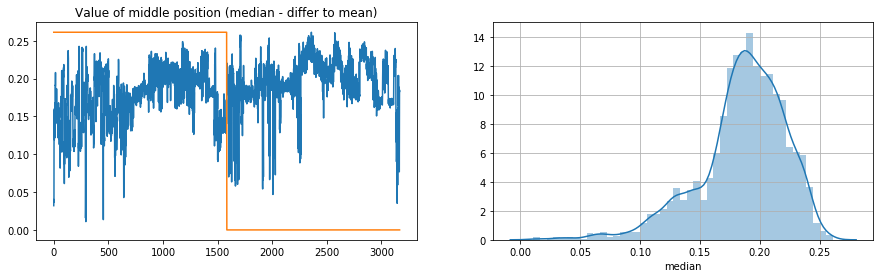

In [86]:
x = df_voice['meanfreq']


title = 'Average of Value(meanfreq)'
show_phist(x, title)

x = df_voice['sd']
title = 'Standard Dispursion(sd)'
show_phist(x, title)

x = df_voice['median']
title = 'Value of middle position (median - differ to mean)'
show_phist(x, title)